# Data Preparation and Advanced Model Evaluation

## Agenda

**Data preparation**

- Handling missing values
- Handling categorical features (review)

**Advanced model evaluation**

- ROC curves and AUC
- Bonus: ROC curve is only sensitive to rank order of predicted probabilities
- Cross-validation

## Part 1: Handling missing values

scikit-learn models expect that all values are **numeric** and **hold meaning**. Thus, missing values are not allowed by scikit-learn.

In [2]:
# read the Titanic data
import pandas as pd
url = '../../dataset/titanic.csv'
titanic = pd.read_csv(url, index_col='PassengerId')
titanic.shape

(891, 11)

In [4]:
#check out the dataset
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
# check for missing values
titanic.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

One possible strategy is to **drop missing values**:

In [9]:
# drop rows with any missing values
titanic.dropna().shape

(183, 11)

In [10]:
# drop rows where Age is missing
titanic[titanic.Age.notnull()].shape

(714, 11)

In [11]:
titanic.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Sometimes a better strategy is to **impute missing values**:

In [12]:
# mean Age
titanic.Age.mean()

29.69911764705882

In [13]:
# median Age
titanic.Age.median()

28.0

In [14]:
# most frequent Age
titanic.Age.mode()

0    24.0
dtype: float64

In [15]:
# fill missing values for Age with the median age
titanic.Age.fillna(titanic.Age.median(), inplace=True)

In [16]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Another strategy would be to build a **KNN model** just to impute missing values. How would we do that?

If values are missing from a categorical feature, we could treat the missing values as **another category**. Why might that make sense?

How do we **choose** between all of these strategies?

## Part 2: Handling categorical features (Review)

How do we include a categorical feature in our model?

- **Ordered categories:** transform them to sensible numeric values (example: small=1, medium=2, large=3)
- **Unordered categories:** use dummy encoding (0/1)

In [17]:
titanic.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [18]:
# encode Sex_Female feature
titanic['Sex_Female'] = titanic.Sex.map({'male':0, 'female':1})

In [19]:
# create a DataFrame of dummy variables for Embarked
embarked_dummies = pd.get_dummies(titanic.Embarked, prefix='Embarked')
embarked_dummies.drop(embarked_dummies.columns[0], axis=1, inplace=True)

# concatenate the original DataFrame and the dummy DataFrame
titanic = pd.concat([titanic, embarked_dummies], axis=1)
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Female,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,0,1
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,0,1
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,1,0,1


In [ ]:
titanic.head(1)

- How do we **interpret** the encoding for Embarked?
- Why didn't we just encode Embarked using a **single feature** (C=0, Q=1, S=2)?
- Does it matter which category we choose to define as the **baseline**?
- Why do we only need **two dummy variables** for Embarked?

In [26]:
# define X and y
feature_cols = ['Pclass', 'Parch', 'Age', 'Sex_Female', 'Embarked_Q', 'Embarked_S']
X = titanic[feature_cols]
y = titanic.Survived

# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# train a KNeighborsClassifier model (use k=20)
from sklearn.neighbors import KNeighborsClassifier
model =KNeighborsClassifier(n_neighbors=20)
model.fit(X_train, y_train)

# make predictions for testing set
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0])

### Evaluation Metrics

In [27]:
# calculate testing accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.7174887892376681


In [29]:
# recall
metrics.recall_score(y_test,y_pred)

0.3595505617977528

In [30]:
# precision
metrics.precision_score(y_test, y_pred)

0.8421052631578947

In [32]:
# f1 score
metrics.f1_score(y_test, y_pred)

0.5039370078740157

In [34]:
# confusion matrix
metrics.confusion_matrix(y_test, y_pred)

array([[128,   6],
       [ 57,  32]])

In [36]:
# extract confusion matrix results
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
print('TN:{} | FP:{} | FN:{} | TP:{}'.format(tn, fp, fn, tp))

TN:128 | FP:6 | FN:57 | TP:32


In [37]:
# classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.96      0.80       134
           1       0.84      0.36      0.50        89

    accuracy                           0.72       223
   macro avg       0.77      0.66      0.65       223
weighted avg       0.75      0.72      0.68       223



## Part 3: ROC curves and AUC

In [40]:
# predict probability of survival
y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred_prob

array([0.15, 0.25, 0.1 , 0.65, 0.4 , 0.5 , 0.75, 0.25, 0.3 , 0.45, 0.5 ,
       0.25, 0.25, 0.3 , 0.4 , 0.6 , 0.4 , 0.75, 0.35, 0.35, 0.2 , 0.65,
       0.3 , 0.1 , 0.  , 0.3 , 0.65, 0.25, 0.7 , 0.5 , 0.1 , 0.2 , 0.3 ,
       0.3 , 0.1 , 0.3 , 0.3 , 0.75, 0.55, 0.  , 0.2 , 0.15, 0.  , 0.1 ,
       0.35, 0.3 , 0.1 , 0.1 , 0.2 , 0.45, 0.75, 0.45, 0.2 , 0.4 , 0.35,
       0.5 , 0.5 , 0.65, 0.6 , 0.25, 0.15, 0.45, 0.55, 0.3 , 0.1 , 0.4 ,
       0.2 , 0.15, 0.2 , 0.45, 0.25, 0.5 , 0.45, 0.6 , 0.1 , 0.15, 0.4 ,
       0.75, 0.5 , 0.25, 0.25, 0.45, 0.6 , 0.1 , 0.45, 0.3 , 0.5 , 0.55,
       0.4 , 0.  , 0.4 , 0.45, 0.4 , 0.1 , 0.  , 0.  , 0.4 , 0.2 , 0.45,
       0.25, 0.35, 0.1 , 0.5 , 0.15, 0.25, 0.15, 0.45, 0.35, 0.3 , 0.65,
       0.5 , 0.15, 0.45, 0.6 , 0.3 , 0.1 , 0.3 , 0.35, 0.45, 0.4 , 0.35,
       0.6 , 0.4 , 0.7 , 0.15, 0.55, 0.55, 0.5 , 0.5 , 0.15, 0.75, 0.15,
       0.3 , 0.7 , 0.5 , 0.4 , 0.45, 0.15, 0.25, 0.25, 0.15, 0.5 , 0.3 ,
       0.4 , 0.35, 0.5 , 0.3 , 0.3 , 0.45, 0.25, 0.

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

Text(0, 0.5, 'True Positive Rate (Sensitivity)')

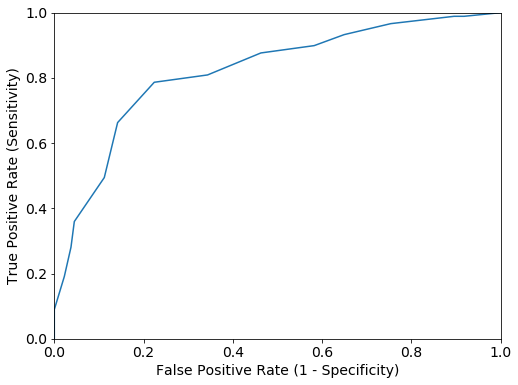

In [42]:
# plot ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

In [43]:
# calculate AUC
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.8194281401978869


Besides allowing you to calculate AUC, seeing the ROC curve can help you to choose a threshold that **balances sensitivity and specificity** in a way that makes sense for the particular context.

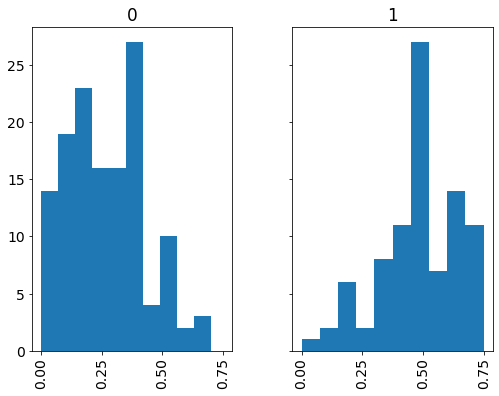

In [45]:
# histogram of predicted probabilities grouped by actual response value
df = pd.DataFrame({'probability':y_pred_prob, 'actual':y_test})
df.hist(column='probability', by='actual', sharex=True, sharey=True);

What would have happened if you had used **y_pred_class** instead of **y_pred_prob** when drawing the ROC curve or calculating AUC?

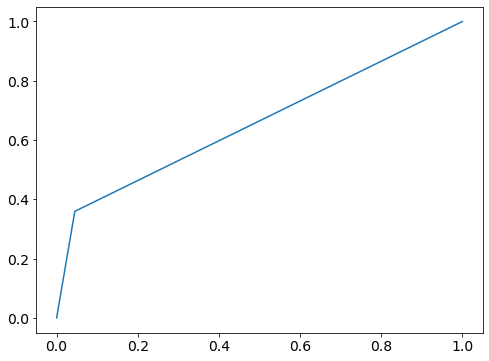

In [47]:
# ROC curve using y_pred_class - WRONG!
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)

In [48]:
# AUC using y_pred_class - WRONG!
print(metrics.roc_auc_score(y_test, y_pred))

0.6573872211973838


If you use **y_pred_class**, it will interpret the zeros and ones as predicted probabilities of 0% and 100%.

## Bonus: ROC curve is only sensitive to rank order of predicted probabilities

In [49]:
# print the first 10 predicted probabilities
y_pred_prob[:10]

array([0.15, 0.25, 0.1 , 0.65, 0.4 , 0.5 , 0.75, 0.25, 0.3 , 0.45])

In [50]:
# take the square root of predicted probabilities (to make them all bigger)
import numpy as np
y_pred_prob_new = np.sqrt(y_pred_prob)

# print the modified predicted probabilities
y_pred_prob_new[:10]

array([0.38729833, 0.5       , 0.31622777, 0.80622577, 0.63245553,
       0.70710678, 0.8660254 , 0.5       , 0.54772256, 0.67082039])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1c4fb590>,
      dtype=object)

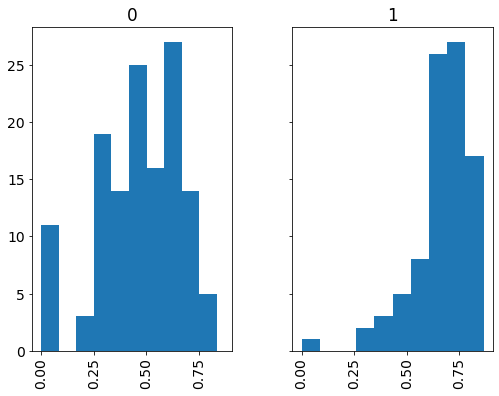

In [51]:
# histogram of predicted probabilities has changed
df = pd.DataFrame({'probability':y_pred_prob_new, 'actual':y_test})
df.hist(column='probability', by='actual', sharex=True, sharey=True)

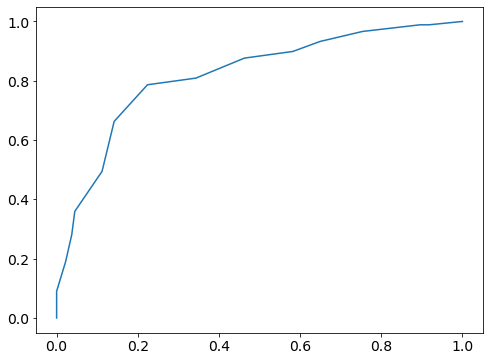

In [52]:
# ROC curve did not change
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob_new)
plt.plot(fpr, tpr)

In [53]:
# AUC did not change
print(metrics.roc_auc_score(y_test, y_pred_prob_new))

0.8194281401978869


## Part 4: Cross-validation

In [55]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=10, scoring='roc_auc').mean()

0.7943948731007554

In [57]:
# add Fare to the model
feature_cols = ['Pclass', 'Parch', 'Age', 'Sex_Female', 'Embarked_Q', 'Embarked_S', 'Fare']
X = titanic[feature_cols]

# recalculate AUC
cross_val_score(model, X, y, cv=10, scoring='roc_auc').mean()

0.7318365730130436